#Stock Analysis and Prediction

##Load the dataset

In [22]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr

In [23]:
yf.pdr_override()

# For time stamps
from datetime import datetime


# The tech stocks we'll use for this analysis
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']


end = datetime.now()
start = datetime(end.year-5, end.month, end.day) # last 5 years data

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)


company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name

df = pd.concat(company_list, axis=0)
df.tail(-10)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2019-07-09,49.799999,50.377499,49.702499,50.310001,48.554043,82312000,APPLE
2019-07-10,50.462502,50.932499,50.389999,50.807499,49.034176,71588400,APPLE
2019-07-11,50.827499,51.097500,50.427502,50.437500,48.677086,80767200,APPLE
2019-07-12,50.612499,51.000000,50.549999,50.825001,49.051064,70380800,APPLE
2019-07-15,51.022499,51.467499,51.000000,51.302502,49.511906,67789600,APPLE
...,...,...,...,...,...,...,...
2024-06-14,183.080002,183.720001,182.229996,183.660004,183.660004,25456400,AMAZON
2024-06-17,182.520004,185.000000,181.220001,184.059998,184.059998,35601900,AMAZON
2024-06-18,183.740005,184.289993,181.429993,182.809998,182.809998,36659200,AMAZON


In [3]:
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03
mean,135.927085,137.454958,134.513231,136.048597,134.409625,9.631790e+07
std,42.156431,42.471571,41.851989,42.163650,42.522509,5.220787e+07
min,48.852501,49.517502,48.145000,48.334999,46.647972,2.404830e+07
25%,115.095003,116.550003,113.580000,115.057503,112.569500,6.231470e+07
50%,145.084999,146.959999,143.665001,145.529999,143.658882,8.267265e+07
75%,170.400002,172.137497,169.025002,170.330002,169.580296,1.128487e+08
max,217.589996,220.199997,213.000000,216.669998,216.669998,4.265100e+08


In [4]:
GOOG.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03
mean,107.984821,109.233670,106.886862,108.090570,107.969156,2.831230e+07
std,31.416874,31.656130,31.160927,31.418777,31.386298,1.249626e+07
min,52.825500,53.566002,50.676800,52.831001,52.770950,6.936000e+06
25%,77.541374,78.756437,76.400126,77.809376,77.720936,2.015372e+07
50%,109.039749,111.522503,107.669998,109.439999,109.315601,2.523810e+07
75%,135.011253,136.617504,133.417118,135.285004,135.131229,3.240650e+07
max,179.750000,182.511993,178.059998,180.259995,180.259995,9.779860e+07


In [5]:
MSFT.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03
mean,264.044531,266.689682,261.304531,264.136995,259.287750,2.893391e+07
std,77.893278,78.305878,77.379974,77.922847,79.406057,1.252598e+07
min,133.300003,133.929993,130.779999,132.210007,126.088089,8.989200e+06
25%,211.497505,214.012505,208.912502,211.339996,204.321438,2.102338e+07
50%,257.914993,260.759995,255.255005,258.354996,253.500526,2.573990e+07
75%,316.702492,320.670006,314.995003,316.977509,314.506882,3.315412e+07
max,449.709991,450.940002,446.510010,449.779999,449.779999,9.701270e+07


In [6]:
AMZN.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03
mean,135.887254,137.530112,134.140813,135.860208,135.860208,7.089912e+07
std,31.318240,31.514343,31.043366,31.258242,31.258242,3.299879e+07
min,82.075500,83.480003,81.301498,81.820000,81.820000,1.762600e+07
25%,103.920002,105.412500,102.035002,103.953497,103.953497,4.954412e+07
50%,140.325752,142.709999,138.037254,139.603752,139.603752,6.221300e+07
75%,163.476753,165.063000,161.396870,163.241875,163.241875,8.350112e+07
max,189.160004,191.699997,187.440002,189.500000,189.500000,3.113460e+08


##Closing price

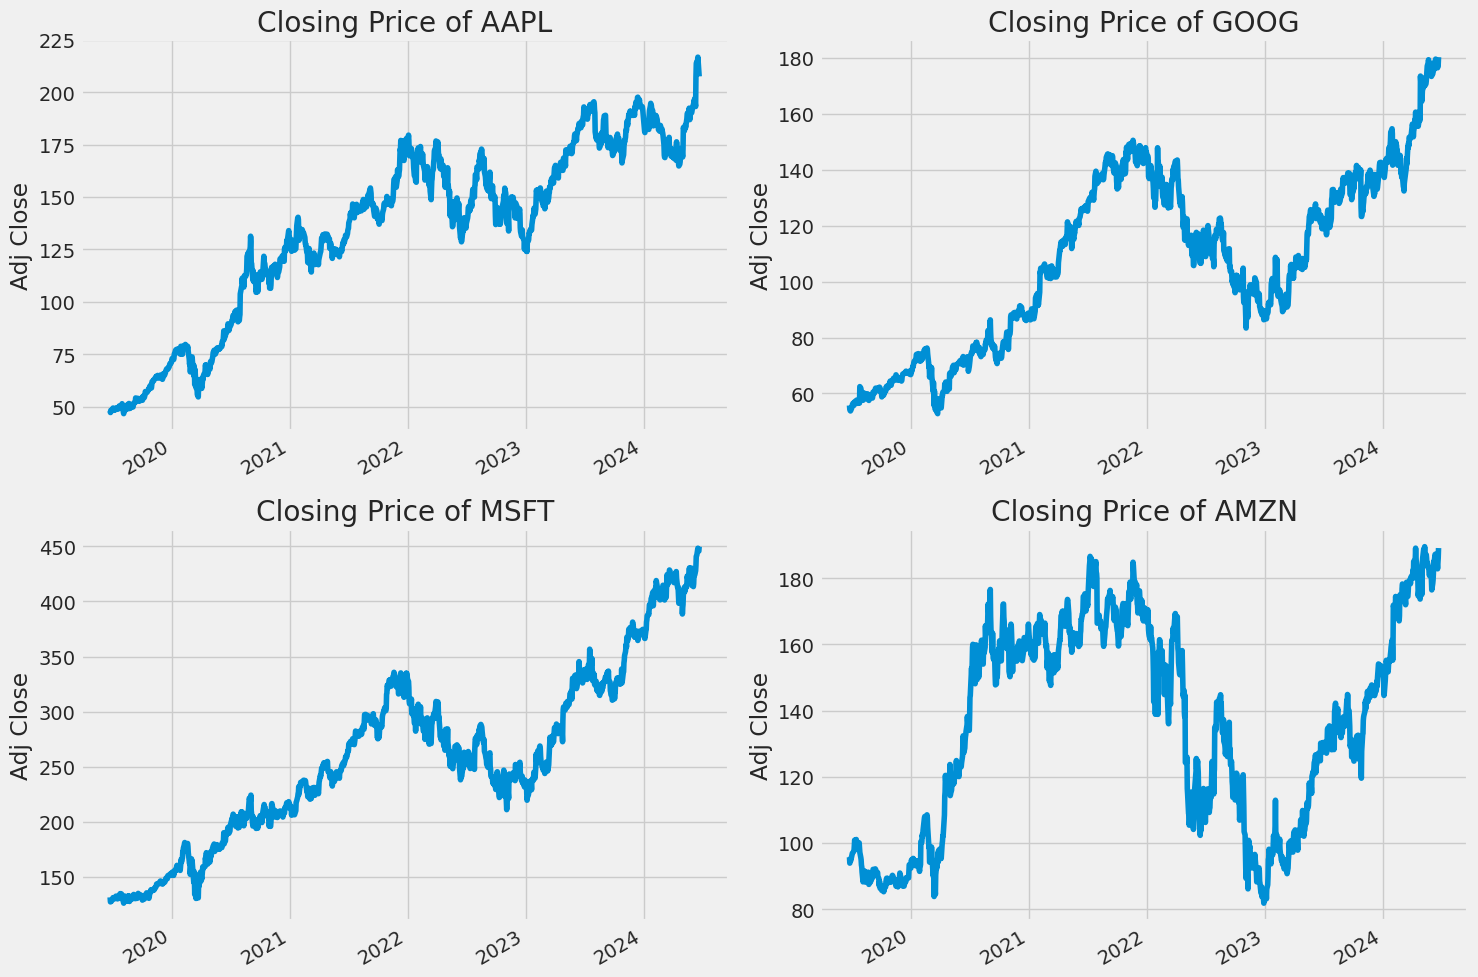

In [24]:
# plot a historical view of the closing price
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.5, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")

plt.tight_layout()

##Plot the sales volume

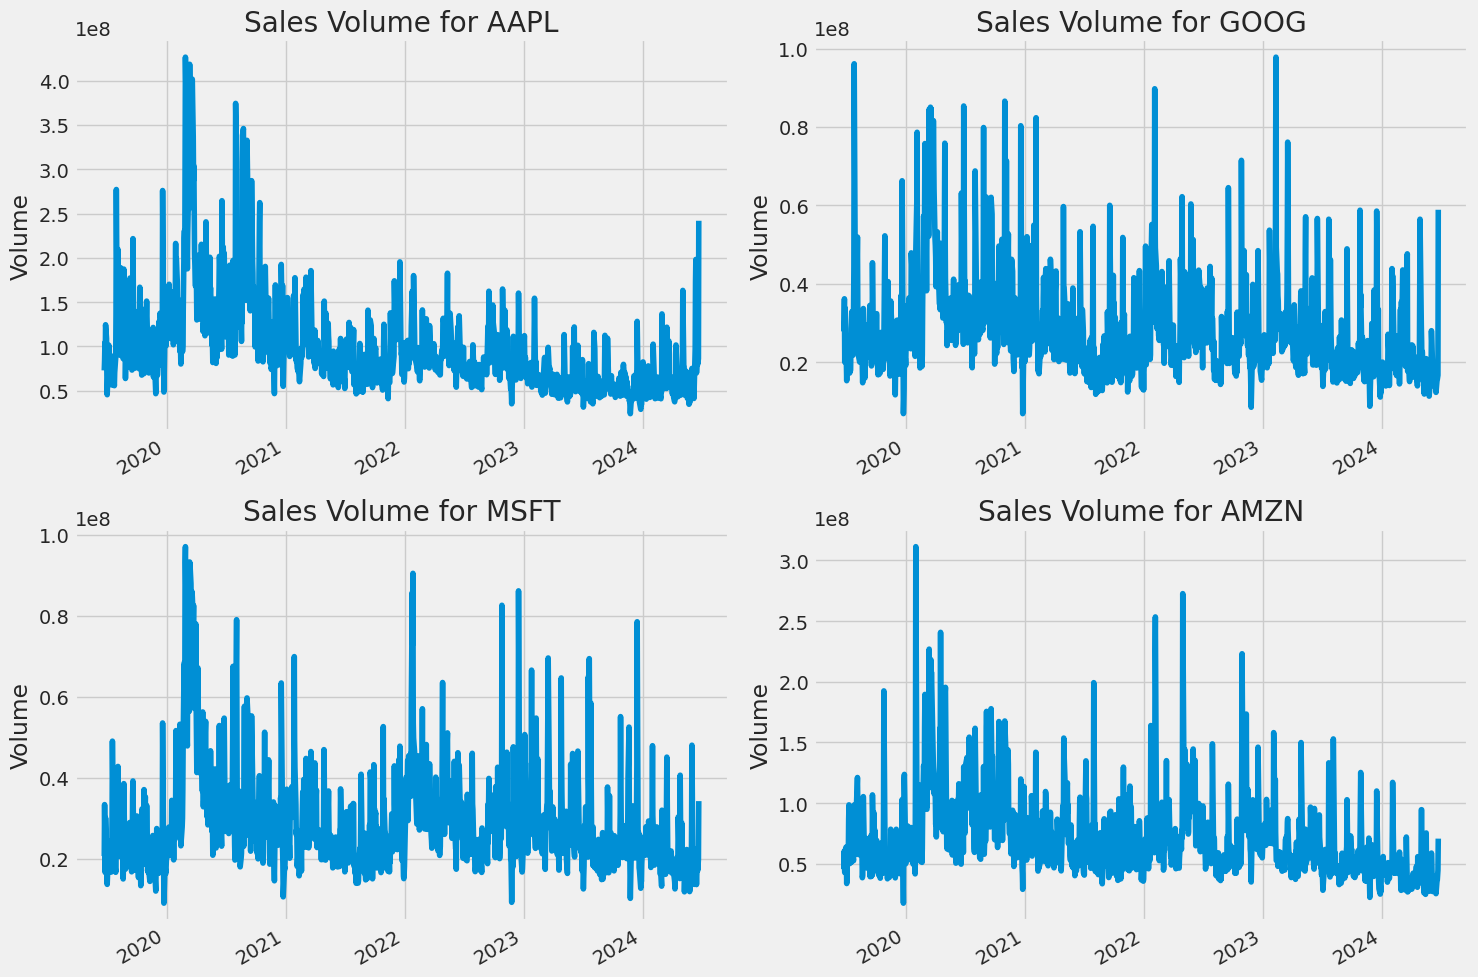

In [25]:
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.5, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")

plt.tight_layout()

##Calculate the moving average

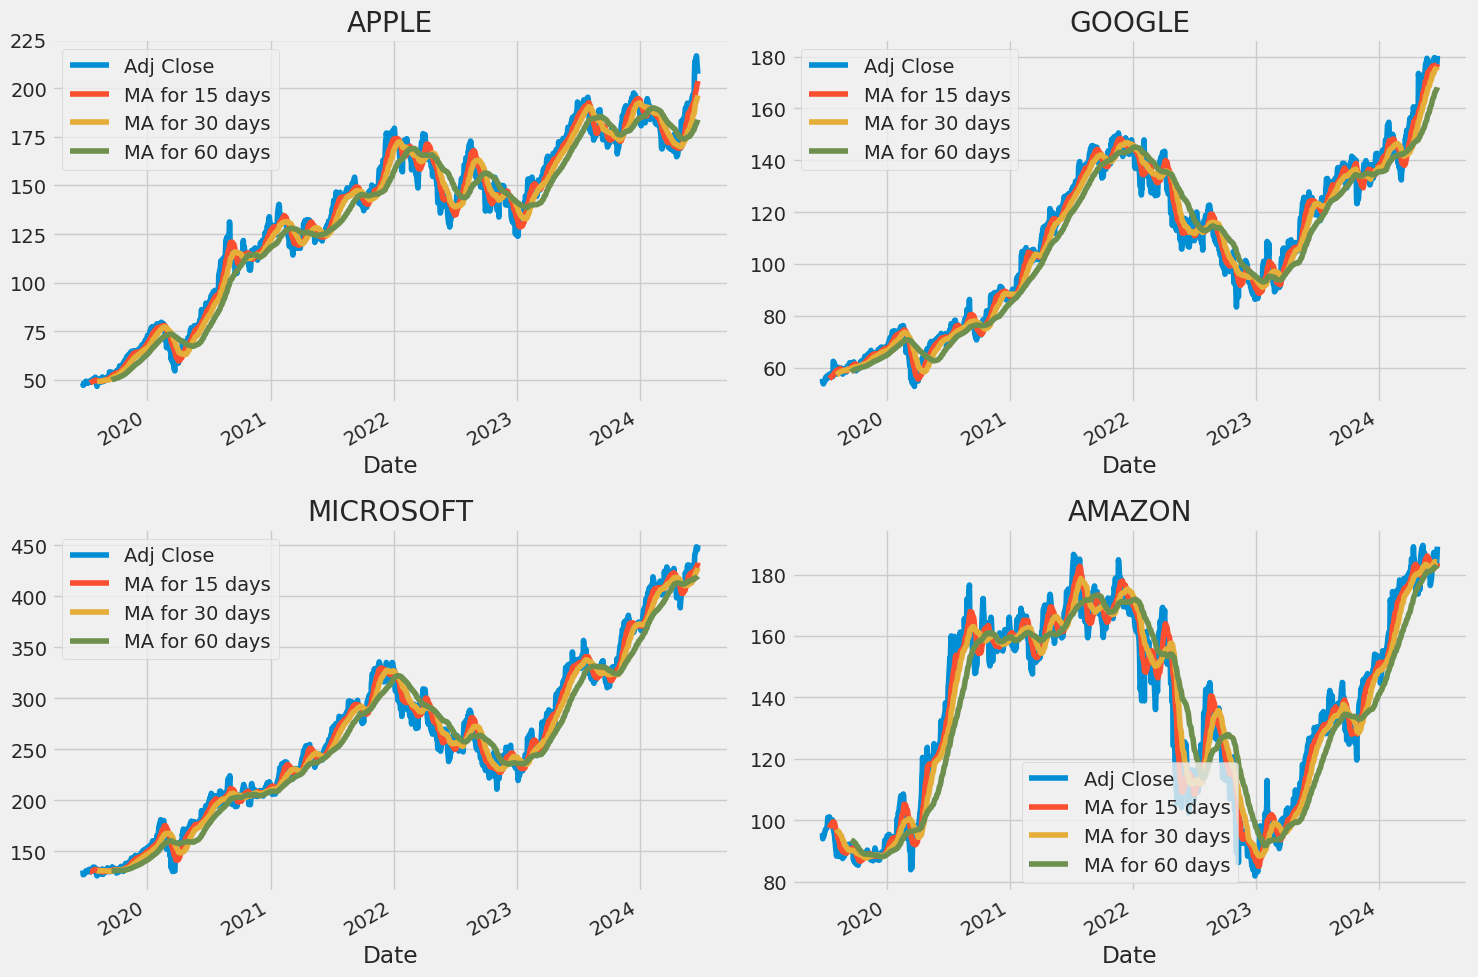

In [26]:
ma_day = [15, 30, 60]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()


fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA for 15 days', 'MA for 30 days', 'MA for 60 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 15 days', 'MA for 30 days', 'MA for 60 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 15 days', 'MA for 30 days', 'MA for 60 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Adj Close', 'MA for 15 days', 'MA for 30 days', 'MA for 60 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

fig.tight_layout()

##Daily return of the stock on average

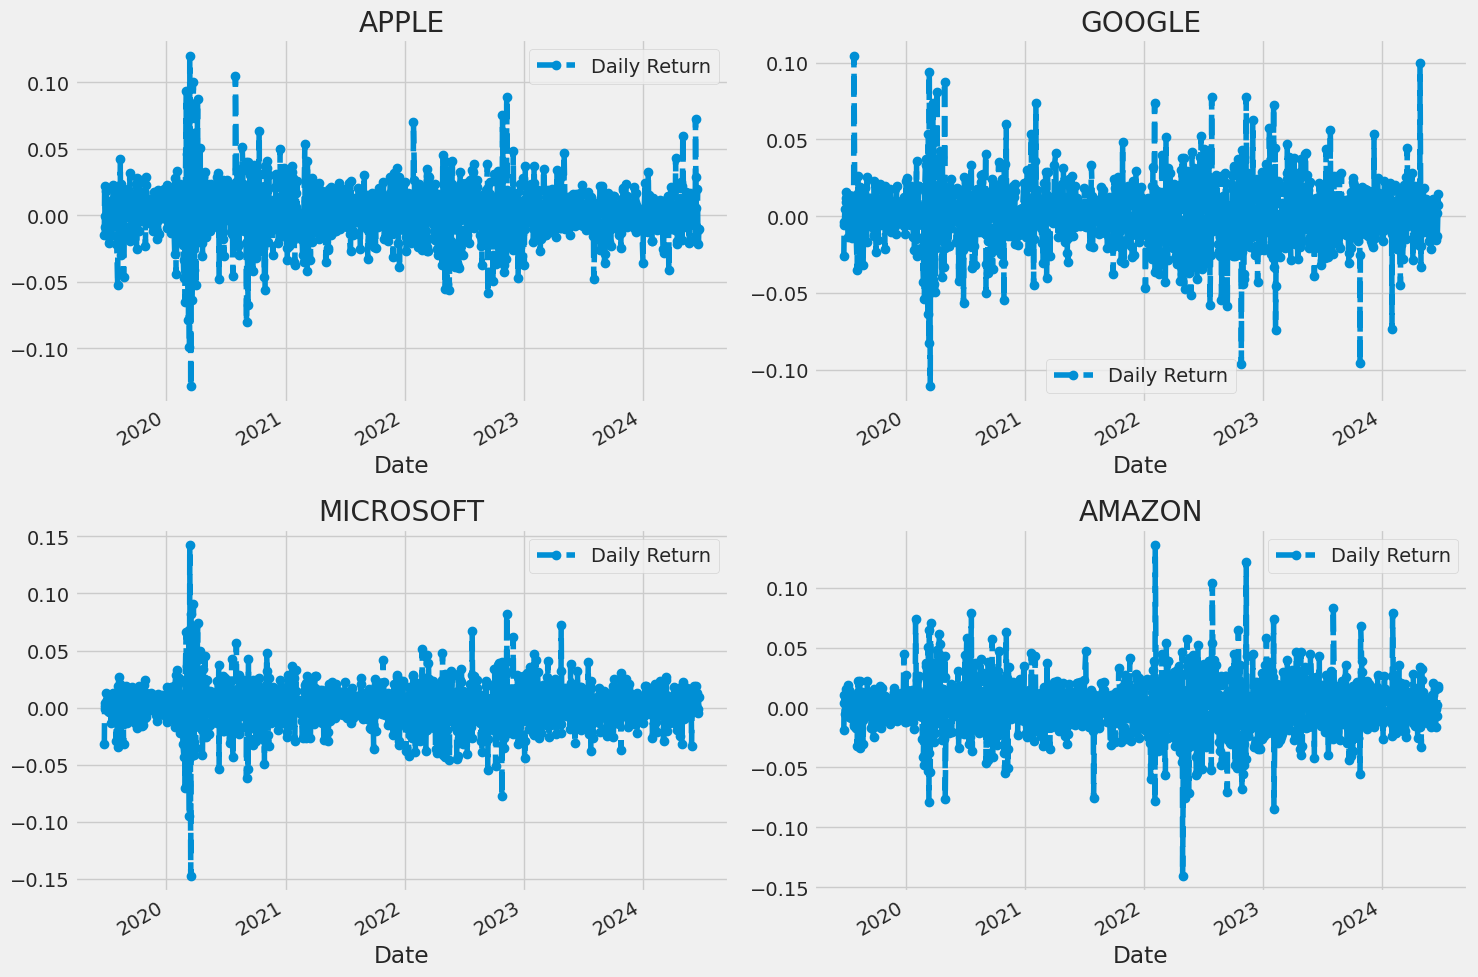

In [27]:
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('AMAZON')

fig.tight_layout()

##KDE plot

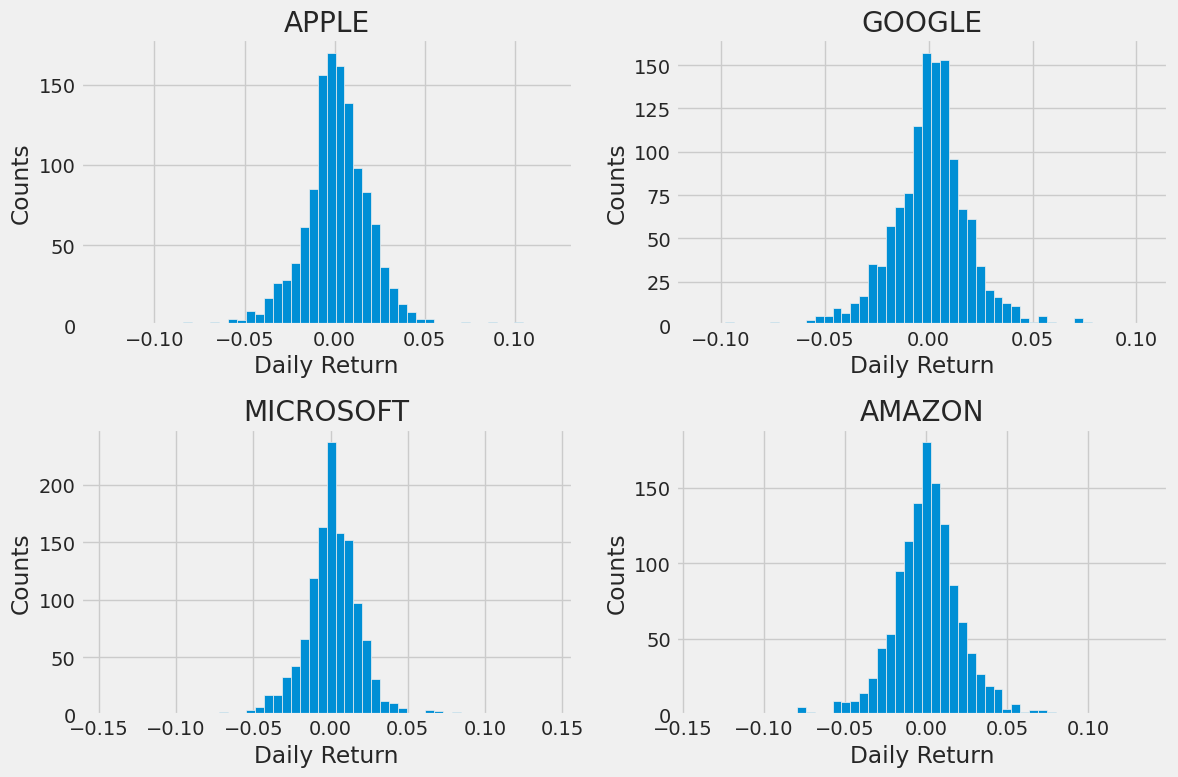

In [28]:
plt.figure(figsize=(12, 8))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{company_name[i - 1]}')

plt.tight_layout()

##Plot correlations

In [19]:
closing_df = pdr.get_data_yahoo(tech_list, start=start, end=end)['Adj Close']

# create DataFrame
tech_rets = closing_df.pct_change()
tech_rets.head()

[*********************100%%**********************]  4 of 4 completed


Ticker,AAPL,AMZN,GOOG,MSFT
Date,,,,
2019-06-24,NaN,NaN,NaN,NaN
2019-06-25,-0.015158,-0.018616,-0.026149,-0.031572
2019-06-26,0.021629,0.010414,-0.006029,0.003747
2019-06-27,-0.000300,0.003399,-0.003510,0.001643
2019-06-28,-0.009112,-0.005593,0.004554,-0.001416


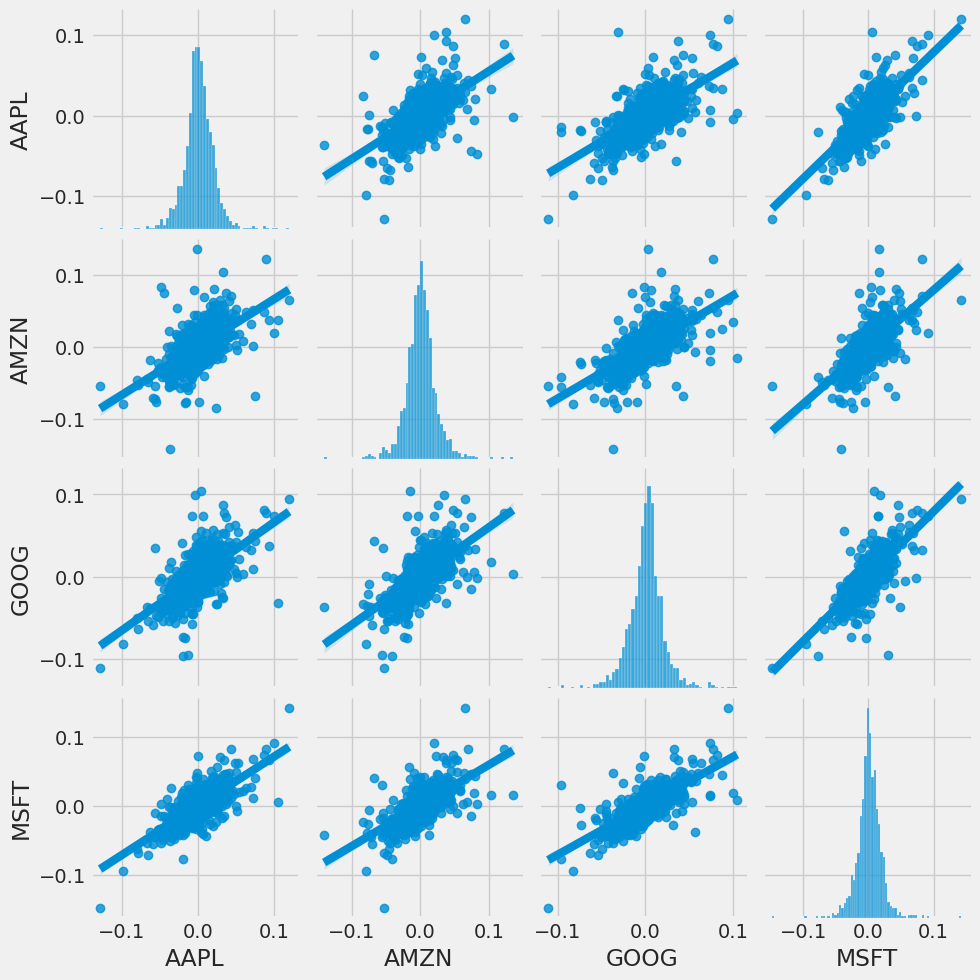

In [20]:
sns.pairplot(tech_rets, kind='reg')

Text(0.5, 1.0, 'Correlation of stock closing price')

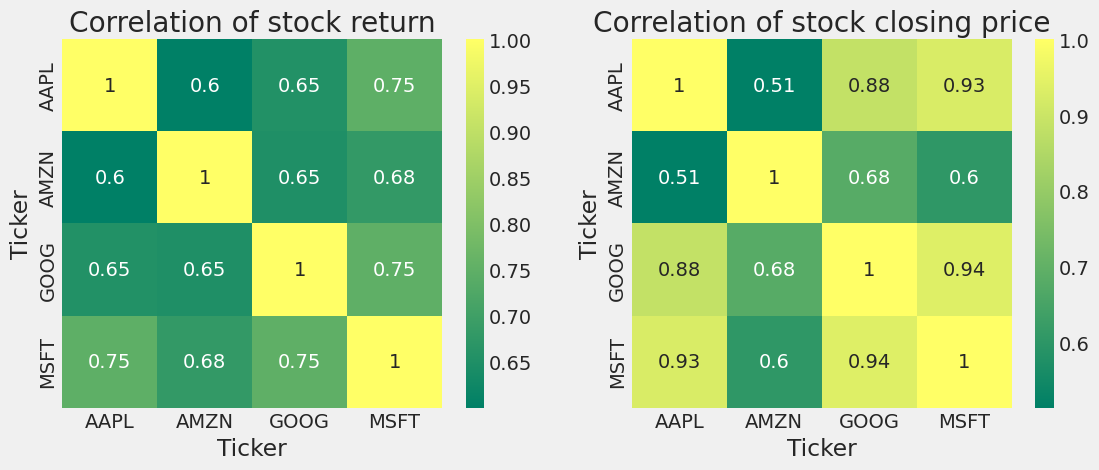

In [29]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock return')

plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock closing price')

##Investment of stock analysis

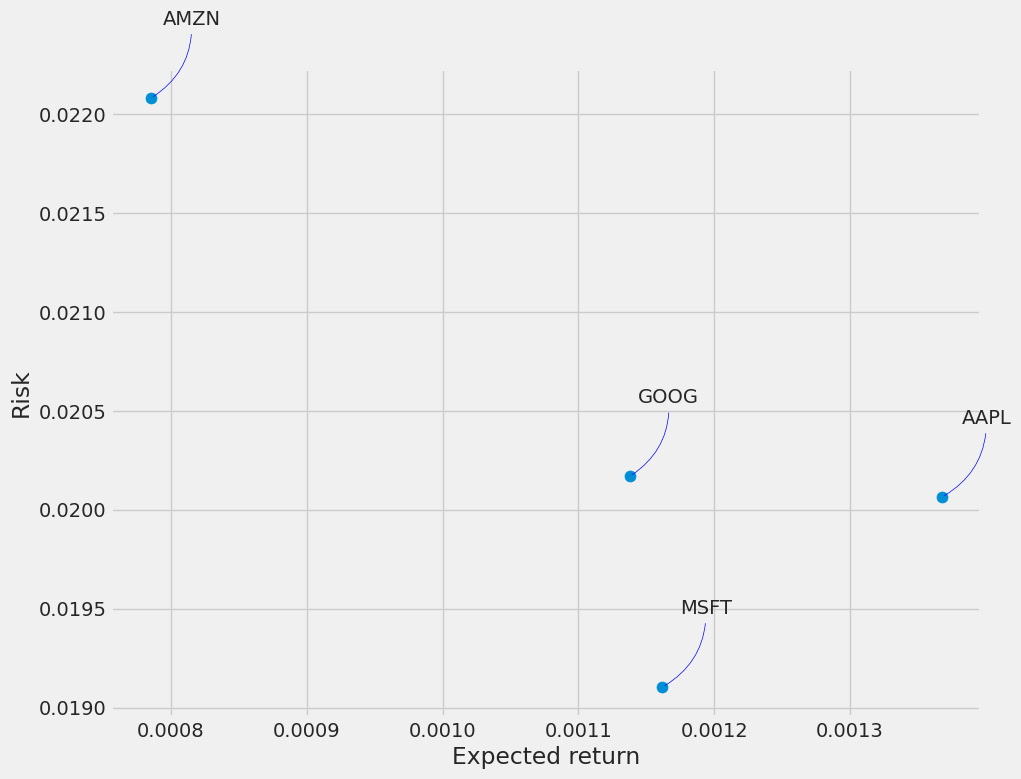

In [30]:
rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom',
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

MSFT stock has the lowest risk with a higher return.

AAPL stocks have medium risk factors and the highest return.

AMZN has the highest risk factor.

##AAPL stock price prediction

In [31]:
# Get the stock quote
df = pdr.get_data_yahoo('AAPL', start='2019-01-01', end=datetime.now())
# Show teh data
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,38.722500,39.712502,38.557499,39.480000,37.793785,148158800
2019-01-03,35.994999,36.430000,35.500000,35.547501,34.029243,365248800
2019-01-04,36.132500,37.137501,35.950001,37.064999,35.481934,234428400
2019-01-07,37.174999,37.207500,36.474998,36.982498,35.402950,219111200
2019-01-08,37.389999,37.955002,37.130001,37.687500,36.077843,164101200
...,...,...,...,...,...,...
2024-06-14,213.850006,215.169998,211.300003,212.490005,212.490005,70122700
2024-06-17,213.369995,218.949997,212.720001,216.669998,216.669998,93728300
2024-06-18,217.589996,218.630005,213.000000,214.289993,214.289993,79943300


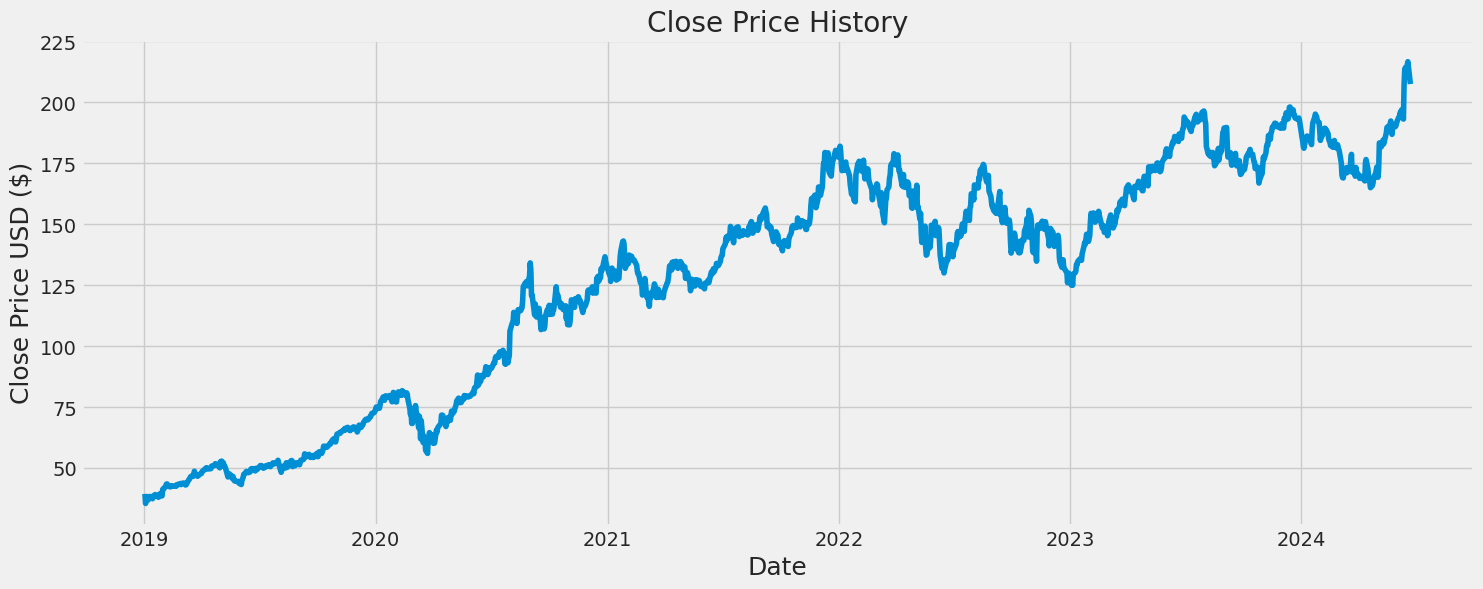

In [32]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [33]:
# Create a new dataframe with only the 'Close column
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

1309

In [34]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.02171182],
       [0.        ],
       [0.0083783 ],
       ...,
       [0.98685969],
       [0.9614073 ],
       [0.94931611]])

In [38]:
from sklearn.model_selection import train_test_split

y = df['Close']
X = df.drop('Close',axis=1)

X_train, X_test, y_train, y_test = train_test_split(X,y , random_state=104,test_size=0.25, shuffle=True)

X_train.shape, X_test.shape

((1032, 5), (345, 5))

##LSTM model

In [40]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (X_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, batch_size=1, epochs=1)

1032/1032 [==============================] - 15s 9ms/step - loss: 1659.8311


In [41]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 5, 128)            66560     
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 25)                1625      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 117619 (459.45 KB)
Trainable params: 117619 (459.45 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


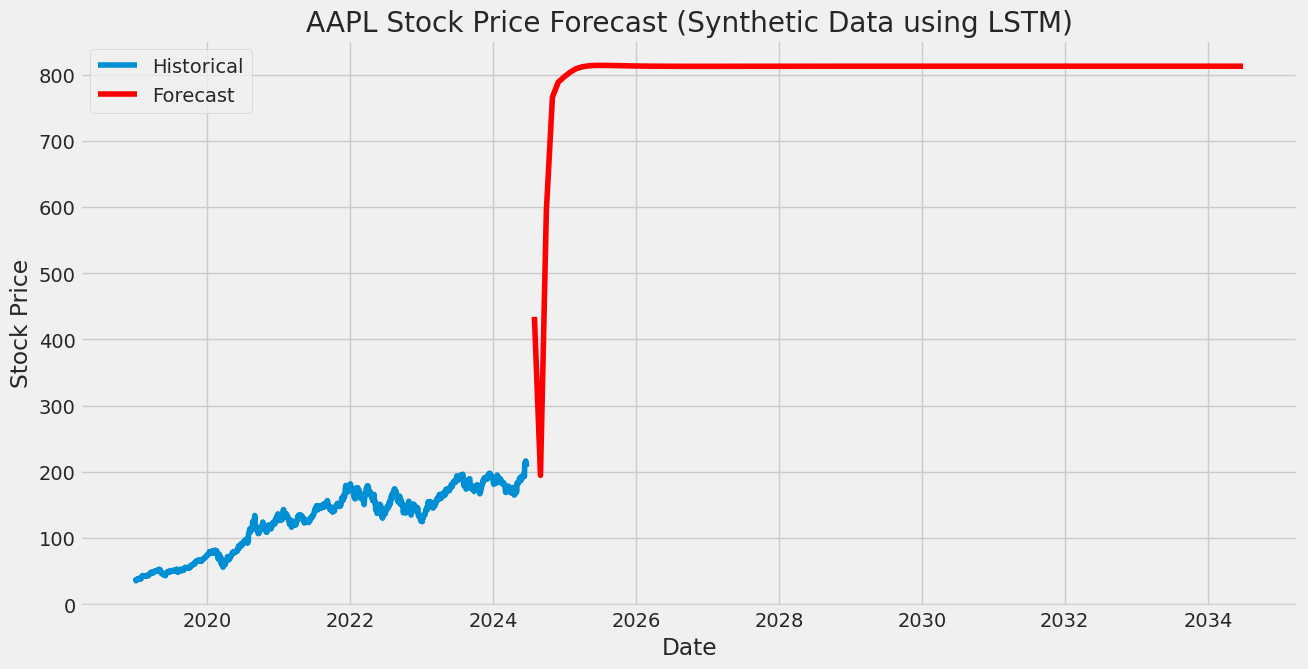

In [55]:
# Forecasting for AAPL
n_future = 12 * 10  # 10 years into the future

time_step = 100

X_input = scaled_data[-time_step:].reshape(1, -1)
temp_input = list(scaled_data[-time_step:])
temp_input = temp_input[0].tolist()
output = []
for i in range(n_future):
    if len(temp_input) > time_step:
        x_input = np.array(temp_input[1:])
        x_input = x_input.reshape(1, -1)
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]
        output.extend(yhat.tolist())
    else:
        x_input = np.array(temp_input)
        x_input = x_input.reshape(1, -1)
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        output.extend(yhat.tolist())

# Inverse transform the predicted values
output = scaler.inverse_transform(output)

# Plot the results
plt.figure(figsize=(14, 7))
plt.plot(data, label='Historical')
plt.plot(pd.date_range(start='2024-07-01', periods=n_future, freq='M'), output, label='Forecast', color='red')
plt.title('AAPL Stock Price Forecast (Synthetic Data using LSTM)')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

##Alternative approach of using LSTM

3714/3714 [==============================] - 122s 32ms/step - loss: 8.1938e-04


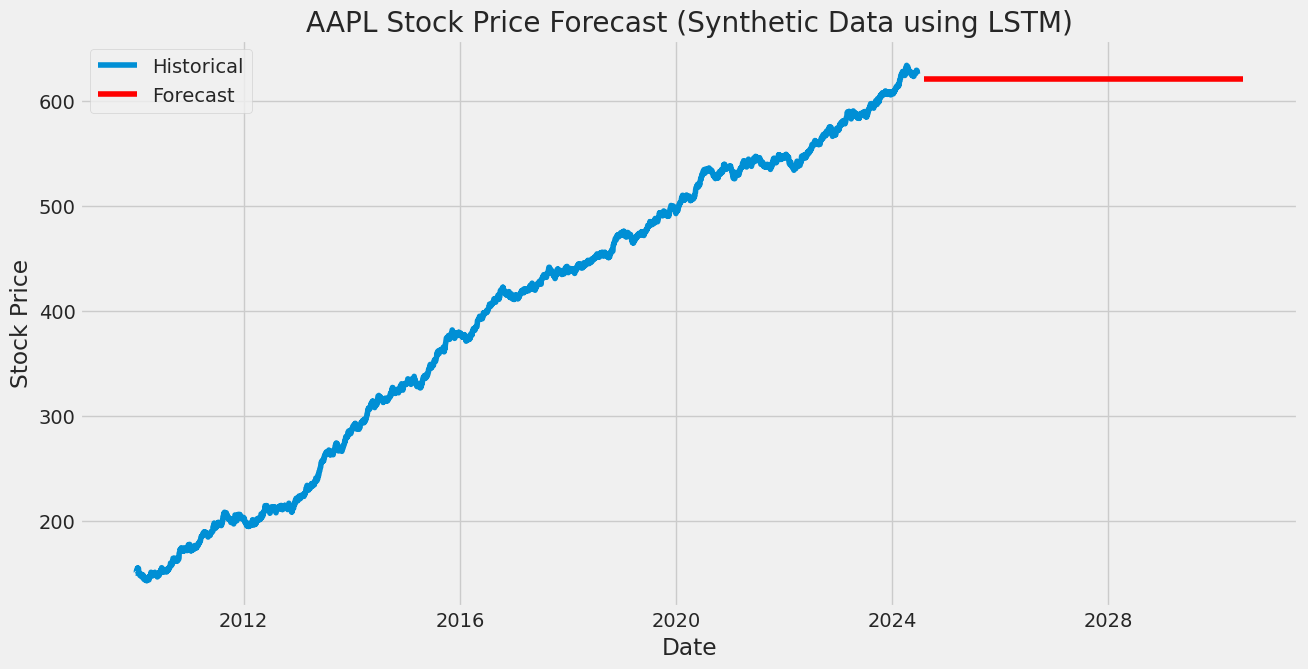

(DatetimeIndex(['2024-07-31', '2024-08-31', '2024-09-30', '2024-10-31',
                '2024-11-30', '2024-12-31', '2025-01-31', '2025-02-28',
                '2025-03-31', '2025-04-30', '2025-05-31', '2025-06-30',
                '2025-07-31', '2025-08-31', '2025-09-30', '2025-10-31',
                '2025-11-30', '2025-12-31', '2026-01-31', '2026-02-28',
                '2026-03-31', '2026-04-30', '2026-05-31', '2026-06-30',
                '2026-07-31', '2026-08-31', '2026-09-30', '2026-10-31',
                '2026-11-30', '2026-12-31', '2027-01-31', '2027-02-28',
                '2027-03-31', '2027-04-30', '2027-05-31', '2027-06-30',
                '2027-07-31', '2027-08-31', '2027-09-30', '2027-10-31',
                '2027-11-30', '2027-12-31', '2028-01-31', '2028-02-29',
                '2028-03-31', '2028-04-30', '2028-05-31', '2028-06-30',
                '2028-07-31', '2028-08-31', '2028-09-30', '2028-10-31',
                '2028-11-30', '2028-12-31', '2029-01-31', '2029-

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Generate synthetic data
np.random.seed(42)
date_range = pd.date_range(start='2010-01-01', end='2024-06-20', freq='B')  # Business days
synthetic_data = np.random.normal(loc=0.1, scale=1, size=len(date_range)).cumsum() + 150
data = pd.Series(synthetic_data, index=date_range)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data.values.reshape(-1, 1))

# Prepare the data for LSTM
def create_dataset(data, time_step=1):
    X, Y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        Y.append(data[i + time_step, 0])
    return np.array(X), np.array(Y)

time_step = 60
X, Y = create_dataset(scaled_data, time_step)

# Reshape input to be [samples, time steps, features]
X = X.reshape(X.shape[0], X.shape[1], 1)

# Create LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_step, 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X, Y, batch_size=1, epochs=1)

# Forecasting
n_future = 12 * 6  # 6 years into the future
temp_input = list(scaled_data[-time_step:])
#temp_input = temp_input.reshape(1, -1).tolist()[0]

output = []
for i in range(n_future):
    if len(temp_input) > time_step:
        #x_input = np.array(temp_input[1:])
        x_input = x_input.reshape(1, -1)
        x_input = x_input.reshape((1, time_step, 1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]
        output.extend(yhat.tolist())
    else:
        x_input = np.array(temp_input)
        x_input = x_input.reshape((1, time_step, 1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        output.extend(yhat.tolist())

# Inverse transform the predicted values
output = scaler.inverse_transform(output)

# Plot the results
plt.figure(figsize=(14, 7))
plt.plot(data, label='Historical')
plt.plot(pd.date_range(start='2024-07-01', periods=n_future, freq='M'), output, label='Forecast', color='red')
plt.title('AAPL Stock Price Forecast (Synthetic Data using LSTM)')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

pd.date_range(start='2024-07-01', periods=n_future, freq='M'), output
